In [106]:
import pulsenet as pn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
params = {'axes.labelsize': 11,
                'axes.linewidth' : 1.5,
                'font.size': 11,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 11,
                'xtick.labelsize': 11,
                'ytick.labelsize': 11,
                'text.usetex': True,
                'lines.linewidth': 1,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)

filename = "ysoTracesWithPileup.root"
x_trace, y_trace, y_phase, y_amp = pn.CreateData(filename, pileup_split=1.0, phase_min=0.1, phase_max=20, amplitude_min=0.5, amplitude_max=1.5)

Created 261852 samples: 100.0 % pileup, 0.0 % no pileup


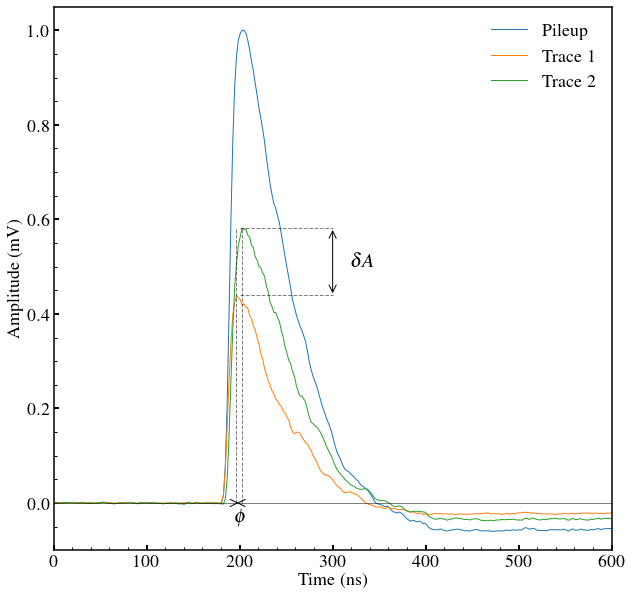

In [176]:
params = {'axes.labelsize': 18,
                'axes.linewidth' : 1.5,
                'font.size': 18,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 18,
                'xtick.labelsize': 18,
                'ytick.labelsize': 18,
                'text.usetex': True,
                'lines.linewidth': 1,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)

n = np.random.randint(0, len(x_trace))
ptrace = x_trace[n][0]
maxptrace = np.max(ptrace)
amp = y_amp[n]
phase = y_phase[n]
y1, y2 = y_trace[n]
t = np.linspace(0, 600,300)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.plot(t, ptrace, label="Pileup")
ax.plot(t, y1, label="Trace 1")
ax.plot(t, y2, label="Trace 2")
ax.plot([2*np.argmax(y1), 2*np.argmax(y1)], [0,1.0*np.max([np.max(y1),np.max(y2)])], color="k", linestyle="--", alpha=0.5,linewidth=1.0)
ax.plot([2*np.argmax(y2), 2*np.argmax(y2)],[0,1.0*np.max([np.max(y1),np.max(y2)])], color="k", linestyle="--", alpha=0.5,linewidth=1.0)
ax.plot([200,300],[np.max(y1), np.max(y1)], color="k", linestyle="--", alpha=0.5,linewidth=1.0)
ax.plot([200,300],[np.max(y2), np.max(y2)], color="k", linestyle="--", alpha=0.5,linewidth=1.0)
ax.text((2*np.argmax(y1)+2*np.argmax(y2))/2, -0.05, r"$\phi$", fontsize=20, ha="center", va="bottom")
ax.text(320, (np.max([np.max(y2),np.max(y1)])-np.min([np.max(y2),np.max(y1)]))/2+np.min([np.max(y2),np.max(y1)]), r"$\delta A$", fontsize=20, ha="left", va="center")
ax.annotate("", xy=(300, np.max(y1)), xytext=(300, np.max(y2)), arrowprops=dict(arrowstyle="<->", color="k", linewidth=1.0))
ax.annotate("", xy=(1.95*np.argmax(y2), 0), xytext=(2.05*np.argmax(y1), 0), arrowprops=dict(arrowstyle="<->", color="k", linewidth=1.0))
ax.plot([0, 600], [0.0, 0.0], color="k", linestyle="-", alpha=0.5)

ax.set_xlim(0, 600)
ax.set_ylim(-0.1, 1.05)
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Amplitude (mV)")
# ax.set_title("Pileup and Traces")
ax.legend(frameon=False)
plt.show()
fig.savefig("plots/InputDataExample.pdf", bbox_inches="tight")

In [32]:
# direct transfer
transfer_model = "models/transfer_model.h5"
# direct transfer with fine tuning
fine_tuned_model = "models/fine_tuned_model.h5"
# long transfer
transfer_model_trace_transfer = "models/transfer_trace_transfer_model.h5"
# long transfer with fine tuning
fine_tuned_trace_transfer_model = "models/fine_tuned_trace_transfer_model.h5"
# control
control_model = "models/control_model.h5"
# sequential
sequential_model ="models/sequential_training_model.h5"

# initial submodules
discriminator_initial_history ="history/discriminator_initial_history.h5"
classifier_initial_history = "history/classifier_initial_history.h5"
phase_initial_history = "history/phase_initial_history.h5"
amplitude_initial_history = "history/amplitude_initial_history.h5"

# direct transfer
transfer_history = "history/transfer_history.h5"
fine_tune_history = "history/fine_tune_history.h5"

# long transfer
transfer_history_trace = "history/transfer_history_trace.h5"
fine_tuned_phase_long_transfer_history = "weights/fine_tuned_phase_long_transfer_history.h5" #(missing)
fine_tuned_amplitude_long_transfer_history = "weights/fine_tuned_amplitude_long_transfer_history.h5" #(missing)

# control
control_history = "history/control_history.h5"

# sequential
discriminator_sequential_history = "history/sequential_training_discriminator_history.h5"
amplitude_sequential_history = "history/sequential_training_amplitude_history.h5"
phase_sequential_history = "history/sequential_training_phase_history.h5"

In [23]:
disc_init_hist = pd.read_hdf(discriminator_initial_history)
class_init_hist = pd.read_hdf(classifier_initial_history)
phase_init_hist = pd.read_hdf(phase_initial_history)
amp_init_hist = pd.read_hdf(amplitude_initial_history)
direct_transfer_hist = pd.read_hdf(transfer_history)
direct_transfer_fine_tune_hist = pd.read_hdf(fine_tune_history)

direct_transfer_initial_epoch = disc_init_hist.shape[0]
direct_transfer_fine_tune_initial_epoch = direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0]

transfer_disc_loss = np.zeros(disc_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_disc_acc = np.zeros(disc_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_disc_val_loss = np.zeros(disc_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_disc_val_acc = np.zeros(disc_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])

transfer_disc_loss[:disc_init_hist.shape[0]] = disc_init_hist["loss"].values
transfer_disc_loss[disc_init_hist.shape[0]:disc_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["transfer_head_loss"].values
transfer_disc_loss[disc_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["transfer_head_loss"].values

transfer_disc_acc[:disc_init_hist.shape[0]] = disc_init_hist["accuracy"].values
transfer_disc_acc[disc_init_hist.shape[0]:disc_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["transfer_head_accuracy"].values
transfer_disc_acc[disc_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["transfer_head_accuracy"].values

transfer_disc_val_loss[:disc_init_hist.shape[0]] = disc_init_hist["val_loss"].values
transfer_disc_val_loss[disc_init_hist.shape[0]:disc_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["val_transfer_head_loss"].values
transfer_disc_val_loss[disc_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["val_transfer_head_loss"].values

transfer_disc_val_acc[:disc_init_hist.shape[0]] = disc_init_hist["val_accuracy"].values
transfer_disc_val_acc[disc_init_hist.shape[0]:disc_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["val_transfer_head_accuracy"].values
transfer_disc_val_acc[disc_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["val_transfer_head_accuracy"].values

transfer_discm_hist = {}
transfer_discm_hist['epoch'] = np.arange(1, transfer_disc_loss.shape[0]+1)
transfer_discm_hist["loss"] = transfer_disc_loss
transfer_discm_hist["accuracy"] = transfer_disc_acc
transfer_discm_hist["val_loss"] = transfer_disc_val_loss
transfer_discm_hist["val_accuracy"] = transfer_disc_val_acc

transfer_direct_trace_history = pd.DataFrame(transfer_discm_hist, columns=["epoch", "loss", "accuracy", "val_loss", "val_accuracy"])

transfer_phase_loss = np.zeros(phase_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_phase_acc = np.zeros(phase_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_phase_val_loss = np.zeros(phase_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_phase_val_acc = np.zeros(phase_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])

transfer_phase_loss[:phase_init_hist.shape[0]] = phase_init_hist["loss"].values
transfer_phase_loss[phase_init_hist.shape[0]:phase_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["phase_regressor_loss"].values
transfer_phase_loss[phase_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["phase_regressor_loss"].values

transfer_phase_acc[:phase_init_hist.shape[0]] = phase_init_hist["accuracy"].values
transfer_phase_acc[phase_init_hist.shape[0]:phase_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["phase_regressor_accuracy"].values
transfer_phase_acc[phase_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["phase_regressor_accuracy"].values

transfer_phase_val_loss[:phase_init_hist.shape[0]] = phase_init_hist["val_loss"].values
transfer_phase_val_loss[phase_init_hist.shape[0]:phase_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["val_phase_regressor_loss"].values
transfer_phase_val_loss[phase_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["val_phase_regressor_loss"].values

transfer_phase_val_acc[:phase_init_hist.shape[0]] = phase_init_hist["val_accuracy"].values
transfer_phase_val_acc[phase_init_hist.shape[0]:phase_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["val_phase_regressor_accuracy"].values
transfer_phase_val_acc[phase_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["val_phase_regressor_accuracy"].values

transfer_phasem_hist = {}
transfer_phasem_hist['epoch'] = np.arange(1, transfer_phase_loss.shape[0]+1)
transfer_phasem_hist["loss"] = transfer_phase_loss
transfer_phasem_hist["accuracy"] = transfer_phase_acc
transfer_phasem_hist["val_loss"] = transfer_phase_val_loss
transfer_phasem_hist["val_accuracy"] = transfer_phase_val_acc

transfer_direct_phase_history = pd.DataFrame(transfer_phasem_hist, columns=["epoch", "loss", "accuracy", "val_loss", "val_accuracy"])

transfer_amp_loss = np.zeros(amp_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_amp_acc = np.zeros(amp_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_amp_val_loss = np.zeros(amp_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])
transfer_amp_val_acc = np.zeros(amp_init_hist.shape[0] + direct_transfer_hist.shape[0] + direct_transfer_fine_tune_hist.shape[0])

transfer_amp_loss[:amp_init_hist.shape[0]] = amp_init_hist["loss"].values
transfer_amp_loss[amp_init_hist.shape[0]:amp_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["amplitude_regressor_loss"].values
transfer_amp_loss[amp_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["amplitude_regressor_loss"].values

transfer_amp_acc[:amp_init_hist.shape[0]] = amp_init_hist["accuracy"].values
transfer_amp_acc[amp_init_hist.shape[0]:amp_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["amplitude_regressor_accuracy"].values
transfer_amp_acc[amp_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["amplitude_regressor_accuracy"].values

transfer_amp_val_loss[:amp_init_hist.shape[0]] = amp_init_hist["val_loss"].values
transfer_amp_val_loss[amp_init_hist.shape[0]:amp_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["val_amplitude_regressor_loss"].values
transfer_amp_val_loss[amp_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["val_amplitude_regressor_loss"].values

transfer_amp_val_acc[:amp_init_hist.shape[0]] = amp_init_hist["val_accuracy"].values
transfer_amp_val_acc[amp_init_hist.shape[0]:amp_init_hist.shape[0]+direct_transfer_hist.shape[0]] = direct_transfer_hist["val_amplitude_regressor_accuracy"].values
transfer_amp_val_acc[amp_init_hist.shape[0]+direct_transfer_hist.shape[0]:] = direct_transfer_fine_tune_hist["val_amplitude_regressor_accuracy"].values

transfer_ampm_hist = {}
transfer_ampm_hist['epoch'] = np.arange(1, transfer_amp_loss.shape[0]+1)
transfer_ampm_hist["loss"] = transfer_amp_loss
transfer_ampm_hist["accuracy"] = transfer_amp_acc
transfer_ampm_hist["val_loss"] = transfer_amp_val_loss
transfer_ampm_hist["val_accuracy"] = transfer_amp_val_acc

transfer_direct_amp_history = pd.DataFrame(transfer_ampm_hist, columns=["epoch", "loss", "accuracy", "val_loss", "val_accuracy"])

In [179]:
transfer_history_trace_df = pd.read_hdf(transfer_history_trace)
disc_init_hist = pd.read_hdf(discriminator_initial_history)
phase_init_hist = pd.read_hdf(phase_initial_history)
amp_init_hist = pd.read_hdf(amplitude_initial_history)

transfer_history_trace_full = {}
transfer_history_trace_full["epoch"] = np.arange(1, transfer_history_trace_df.shape[0]+disc_init_hist.shape[0]+1)
trace_loss = np.zeros(transfer_history_trace_df.shape[0]+disc_init_hist.shape[0])
trace_val_loss = np.zeros(transfer_history_trace_df.shape[0]+disc_init_hist.shape[0])
trace_loss[:disc_init_hist.shape[0]] = disc_init_hist["loss"].values
trace_loss[disc_init_hist.shape[0]:] = transfer_history_trace_df["loss"].values

trace_val_loss[:disc_init_hist.shape[0]] = disc_init_hist["val_loss"].values
trace_val_loss[disc_init_hist.shape[0]:] = transfer_history_trace_df["val_loss"].values

transfer_history_trace_full["trace_loss"] = trace_loss
transfer_history_trace_full["trace_val_loss"] = trace_val_loss

transfer_history_trace_full_df = pd.DataFrame(transfer_history_trace_full, columns=["epoch", "trace_loss", "trace_val_loss"])



In [29]:
transfer_direct_full_history = {}
transfer_direct_full_history['epoch'] = np.arange(1, transfer_direct_trace_history.shape[0]+1)
transfer_direct_full_history["trace_loss"] = transfer_direct_trace_history["loss"].values
transfer_direct_full_history["trace_accuracy"] = transfer_direct_trace_history["accuracy"].values
transfer_direct_full_history["trace_val_loss"] = transfer_direct_trace_history["val_loss"].values
transfer_direct_full_history["trace_val_accuracy"] = transfer_direct_trace_history["val_accuracy"].values
transfer_direct_full_history['phase_loss'] = transfer_direct_phase_history["loss"].values
transfer_direct_full_history['phase_accuracy'] = transfer_direct_phase_history["accuracy"].values
transfer_direct_full_history['phase_val_loss'] = transfer_direct_phase_history["val_loss"].values
transfer_direct_full_history['phase_val_accuracy'] = transfer_direct_phase_history["val_accuracy"].values
transfer_direct_full_history['amp_loss'] = transfer_direct_amp_history["loss"].values
transfer_direct_full_history['amp_accuracy'] = transfer_direct_amp_history["accuracy"].values
transfer_direct_full_history['amp_val_loss'] = transfer_direct_amp_history["val_loss"].values
transfer_direct_full_history['amp_val_accuracy'] = transfer_direct_amp_history["val_accuracy"].values

transfer_direct_full_history_df = pd.DataFrame(transfer_direct_full_history, columns=transfer_direct_full_history.keys())
transfer_direct_full_history_df.to_hdf("history/transfer_direct_full_history.h5", key="df", mode="w")

In [30]:
control_history_df = pd.read_hdf(control_history, key="hist")
control_history_df.head()
control_full_history = {}
control_full_history['epoch'] = np.arange(1, control_history_df.shape[0]+1)
control_full_history["trace_loss"] = control_history_df["transfer_head_loss"].values
control_full_history["trace_accuracy"] = control_history_df["transfer_head_accuracy"].values
control_full_history["trace_val_loss"] = control_history_df["val_transfer_head_loss"].values
control_full_history["trace_val_accuracy"] = control_history_df["val_transfer_head_accuracy"].values
control_full_history['phase_loss'] = control_history_df["phase_regressor_loss"].values
control_full_history['phase_accuracy'] = control_history_df["phase_regressor_accuracy"].values
control_full_history['phase_val_loss'] = control_history_df["val_phase_regressor_loss"].values
control_full_history['phase_val_accuracy'] = control_history_df["val_phase_regressor_accuracy"].values
control_full_history['amp_loss'] = control_history_df["amplitude_regressor_loss"].values
control_full_history['amp_accuracy'] = control_history_df["amplitude_regressor_accuracy"].values
control_full_history['amp_val_loss'] = control_history_df["val_amplitude_regressor_loss"].values
control_full_history['amp_val_accuracy'] = control_history_df["val_amplitude_regressor_accuracy"].values

control_full_history_df = pd.DataFrame(control_full_history, columns=control_full_history.keys())
control_full_history_df.to_hdf("history/control_full_history.h5", key="df", mode="w")

In [38]:
disc_init_hist = pd.read_hdf(discriminator_initial_history)
disc_sequential_hist = pd.read_hdf(discriminator_sequential_history)
phase_sequential_hist = pd.read_hdf(phase_sequential_history)

disc_loss = np.zeros(disc_init_hist.shape[0]+disc_sequential_hist.shape[0])
disc_acc = np.zeros(disc_init_hist.shape[0]+disc_sequential_hist.shape[0])
disc_val_loss = np.zeros(disc_init_hist.shape[0]+disc_sequential_hist.shape[0])
disc_val_acc = np.zeros(disc_init_hist.shape[0]+disc_sequential_hist.shape[0])

phase_loss = np.zeros(phase_sequential_hist.shape[0])
phase_acc = np.zeros(phase_sequential_hist.shape[0])
phase_val_loss = np.zeros(phase_sequential_hist.shape[0])
phase_val_acc = np.zeros(phase_sequential_hist.shape[0])

disc_loss[:disc_init_hist.shape[0]] = disc_init_hist["loss"].values
disc_loss[disc_init_hist.shape[0]:] = disc_sequential_hist["loss"].values
disc_acc[:disc_init_hist.shape[0]] = disc_init_hist["accuracy"].values
disc_acc[disc_init_hist.shape[0]:] = disc_sequential_hist["accuracy"].values

disc_val_loss[:disc_init_hist.shape[0]] = disc_init_hist["val_loss"].values
disc_val_loss[disc_init_hist.shape[0]:] = disc_sequential_hist["val_loss"].values
disc_val_acc[:disc_init_hist.shape[0]] = disc_init_hist["val_accuracy"].values
disc_val_acc[disc_init_hist.shape[0]:] = disc_sequential_hist["val_accuracy"].values

phase_loss[:] = phase_sequential_hist["loss"].values
phase_acc[:] = phase_sequential_hist["accuracy"].values
phase_val_loss[:] = phase_sequential_hist["val_loss"].values
phase_val_acc[:] = phase_sequential_hist["val_accuracy"].values

sequential_full_history = {}
sequential_full_history['epoch'] = np.arange(1, disc_loss.shape[0]+1)
sequential_full_history["trace_loss"] = disc_loss
sequential_full_history["trace_accuracy"] = disc_acc
sequential_full_history["trace_val_loss"] = disc_val_loss
sequential_full_history["trace_val_accuracy"] = disc_val_acc
sequential_full_history['phase_loss'] = phase_loss
sequential_full_history['phase_accuracy'] = phase_acc
sequential_full_history['phase_val_loss'] = phase_val_loss
sequential_full_history['phase_val_accuracy'] = phase_val_acc

sequential_full_history_df = pd.DataFrame(sequential_full_history, columns=sequential_full_history.keys())
sequential_full_history_df.to_hdf("history/sequential_full_history.h5", key="df", mode="w")


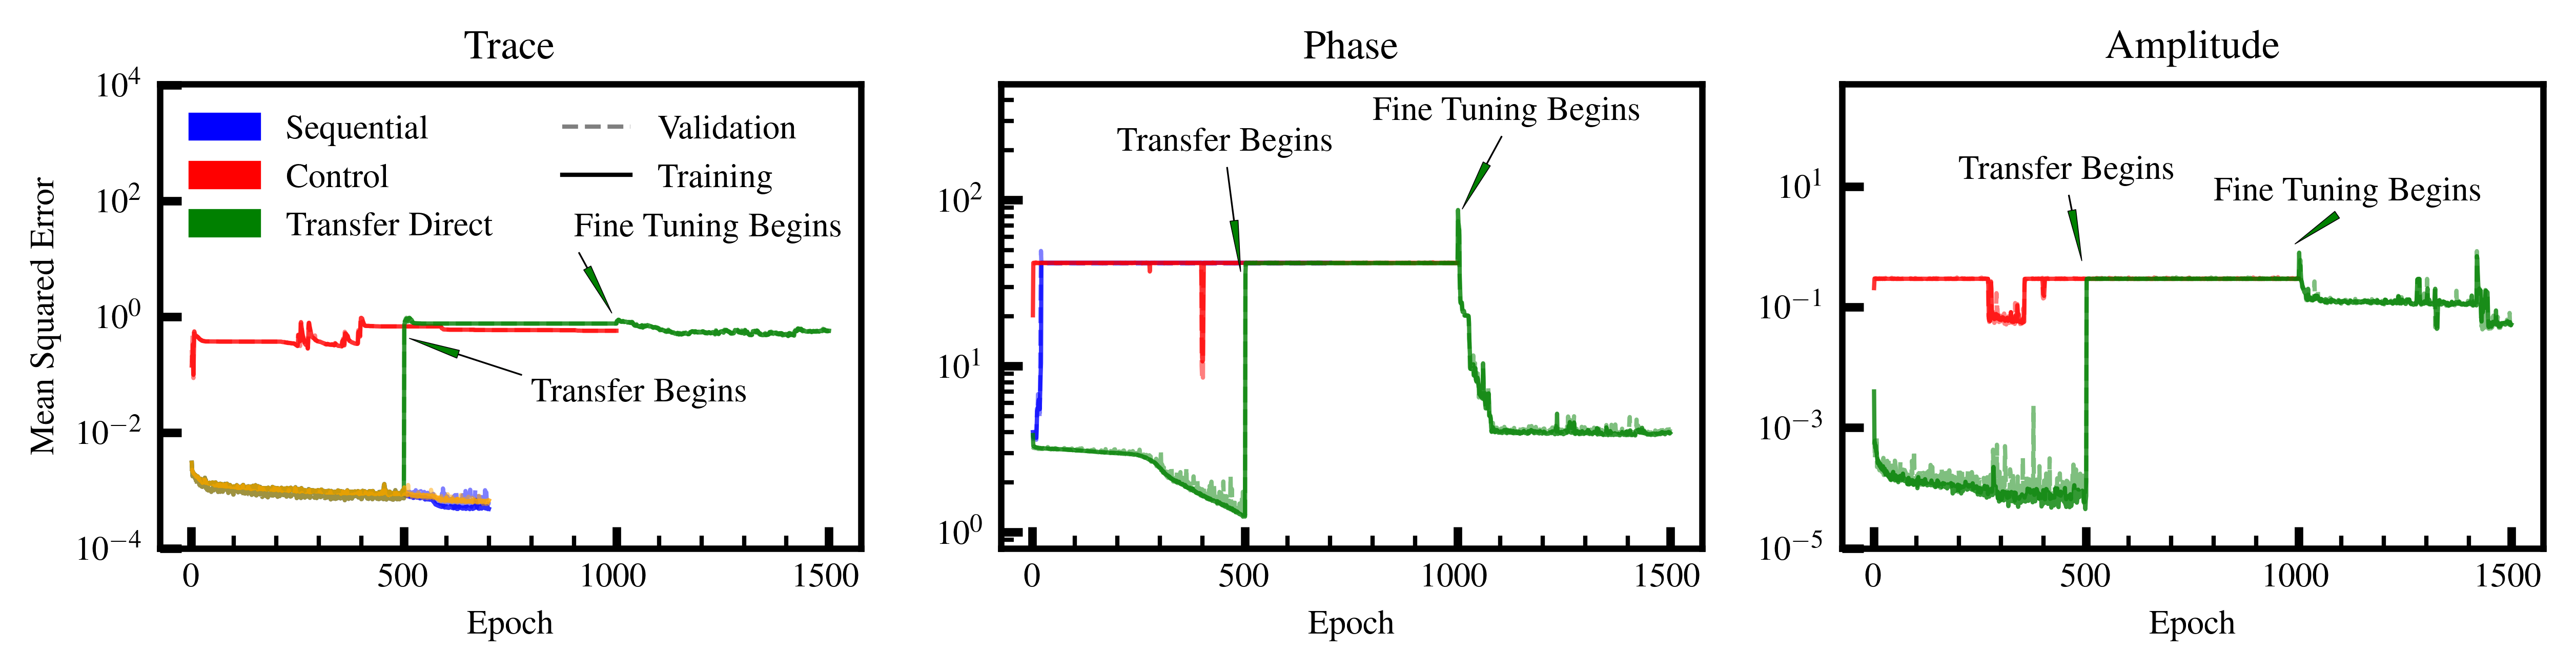

In [181]:
params = {'axes.labelsize': 8,
                'axes.linewidth' : 1.5,
                'font.size': 8,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 8,
                'xtick.labelsize': 8,
                'ytick.labelsize': 8,
                'text.usetex': True,
                'lines.linewidth': 1,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)

fig = plt.figure(figsize=(10, 2), dpi=600)
ax = fig.add_subplot(131)
ax.plot(sequential_full_history_df["epoch"], sequential_full_history_df["trace_loss"], label="Trace Loss", color="blue",alpha=0.8)
ax.plot(sequential_full_history_df["epoch"], sequential_full_history_df["trace_val_loss"], label="Trace Validation Loss", color="blue", linestyle="--", alpha=0.5)
ax.plot(control_full_history_df["epoch"], control_full_history_df["trace_loss"], label="Control Trace Loss", color="red",alpha=0.8)
ax.plot(control_full_history_df["epoch"], control_full_history_df["trace_val_loss"], label="Control Trace Validation Loss", color="red", linestyle="--", alpha=0.5)
ax.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["trace_loss"], label="Transfer Direct Trace Loss", color="green",alpha=0.8)
ax.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["trace_val_loss"], label="Transfer Direct Trace Validation Loss", color="green",linestyle="--", alpha=0.5)
ax.plot(transfer_history_trace_full_df["epoch"], transfer_history_trace_full_df["trace_loss"], label="Transfer Trace Loss", color="orange",alpha=0.8)
ax.plot(transfer_history_trace_full_df["epoch"],transfer_history_trace_full_df['trace_val_loss'], label="Transfer Trace Validation Loss", color="orange", linestyle="--", alpha=0.5)


ax.set_yscale("log")
# ax.set_xscale("log")

ax.set_xlabel("Epoch")
import matplotlib.patches as mpatches
ax.set_ylabel("Mean Squared Error")
ax.legend(loc="upper left", frameon=False,
        handles=[mpatches.Patch(color="blue") , mpatches.Patch(color="red"), mpatches.Patch(color="green"), ax.plot([],[], color="black", linestyle="--",alpha=0.5)[0], ax.plot([],[], color="black", linestyle="-")[0]],
        labels=["Sequential", "Control", "Transfer Direct", "Validation", "Training"],
        ncol=2)
        
ax2 = fig.add_subplot(132)
ax2.plot(sequential_full_history_df["epoch"], sequential_full_history_df["phase_loss"], label="Phase Loss", color="blue",alpha=0.8)
ax2.plot(sequential_full_history_df["epoch"], sequential_full_history_df["phase_val_loss"], label="Phase Validation Loss", color="blue", linestyle="--", alpha=0.5)
ax2.plot(control_full_history_df["epoch"], control_full_history_df["phase_loss"], label="Control Phase Loss", color="red",alpha=0.8)
ax2.plot(control_full_history_df["epoch"], control_full_history_df["phase_val_loss"], label="Control Phase Validation Loss", color="red", linestyle="--", alpha=0.5)
ax2.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["phase_loss"], label="Transfer Direct Phase Loss", color="green",alpha=0.8)
ax2.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["phase_val_loss"], label="Transfer Direct Phase Validation Loss", color="green", linestyle="--", alpha=0.5)
ax2.set_yscale("log")
# ax2.set_xscale("log")

ax2.set_xlabel("Epoch")


ax3 = fig.add_subplot(133)
# ax3.plot(sequential_full_history_df["epoch"], sequential_full_history_df["amp_loss"], label="Amplitude Loss", color="blue")
# ax3.plot(sequential_full_history_df["epoch"], sequential_full_history_df["amp_val_loss"], label="Amplitude Validation Loss", color="blue", linestyle="--", alpha=0.5)
ax3.plot(control_full_history_df["epoch"], control_full_history_df["amp_loss"], label="Control Amplitude Loss", color="red",alpha=0.8)
ax3.plot(control_full_history_df["epoch"], control_full_history_df["amp_val_loss"], label="Control Amplitude Validation Loss", color="red", linestyle="--", alpha=0.5)
ax3.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["amp_loss"], label="Transfer Direct Amplitude Loss", color="green",alpha=0.8)
ax3.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["amp_val_loss"],
         label="Transfer Direct Amplitude Validation Loss", color="green",
         linestyle="--", alpha=0.5)


ax.set_title("Trace")
ax2.set_title("Phase")
ax3.set_title("Amplitude")

ax.annotate('Transfer Begins', xy=(direct_transfer_initial_epoch+10, transfer_direct_full_history_df["trace_loss"][direct_transfer_initial_epoch]-0.3),
            xytext=(direct_transfer_initial_epoch+300, 0.01**transfer_direct_full_history_df["trace_loss"][direct_transfer_initial_epoch]),
            arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))
ax.annotate('Fine Tuning Begins', xy=(direct_transfer_fine_tune_initial_epoch-10, transfer_direct_full_history_df["trace_loss"][direct_transfer_fine_tune_initial_epoch]+0.3),
            xytext=(direct_transfer_fine_tune_initial_epoch-100, 30*transfer_direct_full_history_df["trace_loss"][direct_transfer_fine_tune_initial_epoch]),
            arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))

ax2.annotate('Transfer Begins', xy=(direct_transfer_initial_epoch-10, transfer_direct_full_history_df["phase_loss"][direct_transfer_initial_epoch]+0.3), 
             xytext=(direct_transfer_initial_epoch-300, 5.5*transfer_direct_full_history_df["phase_loss"][direct_transfer_initial_epoch]),
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))
ax2.annotate('Fine Tuning Begins', xy=(direct_transfer_fine_tune_initial_epoch+10, transfer_direct_full_history_df["phase_loss"][direct_transfer_fine_tune_initial_epoch]+0.3),
             xytext=(direct_transfer_fine_tune_initial_epoch-200, 3.5*transfer_direct_full_history_df["phase_loss"][direct_transfer_fine_tune_initial_epoch]), 
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))

ax3.annotate('Transfer Begins', xy=(direct_transfer_initial_epoch-10, transfer_direct_full_history_df["amp_loss"][direct_transfer_initial_epoch]+0.3),
             xytext=(direct_transfer_initial_epoch-300, 50*transfer_direct_full_history_df["amp_loss"][direct_transfer_initial_epoch]), 
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))
ax3.annotate('Fine Tuning Begins', xy=(direct_transfer_fine_tune_initial_epoch-10, transfer_direct_full_history_df["amp_loss"][direct_transfer_fine_tune_initial_epoch]+0.3),
             xytext=(direct_transfer_fine_tune_initial_epoch-200, 7.5*transfer_direct_full_history_df["amp_loss"][direct_transfer_fine_tune_initial_epoch]),
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))

ax.set_ylim(0.0001, 10500)
ax2.set_ylim(0.8, 500)
ax3.set_yscale("log")
# ax3.set_xscale("log")
ax3.set_ylim(0.00001, 500)
ax3.set_xlabel("Epoch")
                                                  
plt.show()

In [174]:
params = {'axes.labelsize': 8,
                'axes.linewidth' : 1.5,
                'font.size': 8,
                'font.family': 'times',
                'mathtext.fontset': 'stix',
                'legend.fontsize': 8,
                'xtick.labelsize': 8,
                'ytick.labelsize': 8,
                'text.usetex': True,
                'lines.linewidth': 1,
                'lines.linestyle': '-',
                'lines.markersize' : 6,
                'lines.markeredgewidth' : 1,
                'xtick.major.size' : 5,
                'xtick.minor.size' : 3,
                'xtick.major.width' : 2,
                'xtick.minor.width' : 1,
                'xtick.direction' : 'in',
                'ytick.major.size' : 5,
                'ytick.minor.size' : 3,
                'ytick.major.width' : 2,
                'ytick.minor.width' : 1,
                'ytick.direction' : 'in',
                'xtick.minor.visible' : True,
                'ytick.minor.visible' : True,
                'savefig.transparent': True,
                'errorbar.capsize': 1.5,
                }
plt.rcParams.update(params)

fig = plt.figure(figsize=(10, 2), dpi=200)
ax = fig.add_subplot(131)
ax.plot(sequential_full_history_df["epoch"], sequential_full_history_df["trace_accuracy"], label="Trace accuracy", color="blue",alpha=0.8)
ax.plot(sequential_full_history_df["epoch"], sequential_full_history_df["trace_val_accuracy"], label="Trace Validation accuracy", color="blue", linestyle="--", alpha=0.5)
ax.plot(control_full_history_df["epoch"], control_full_history_df["trace_accuracy"], label="Control Trace accuracy", color="red",alpha=0.8)
ax.plot(control_full_history_df["epoch"], control_full_history_df["trace_val_accuracy"], label="Control Trace Validation accuracy", color="red", linestyle="--", alpha=0.5)
ax.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["trace_accuracy"], label="Transfer Direct Trace accuracy", color="green",alpha=0.8)
ax.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["trace_val_accuracy"], label="Transfer Direct Trace Validation accuracy", color="green",linestyle="--", alpha=0.5)
ax.set_yscale("log")
# ax.set_xscale("log")

ax.set_xlabel("Epoch")
import matplotlib.patches as mpatches
ax.set_ylabel("Mean Squared Error")
ax.legend(loc="upper left", frameon=False,
        handles=[mpatches.Patch(color="blue") , mpatches.Patch(color="red"), mpatches.Patch(color="green"), ax.plot([],[], color="black", linestyle="--",alpha=0.5)[0], ax.plot([],[], color="black", linestyle="-")[0]],
        labels=["Sequential", "Control", "Transfer Direct", "Validation", "Training"],
        ncol=2)
        
ax2 = fig.add_subplot(132)
ax2.plot(sequential_full_history_df["epoch"], sequential_full_history_df["phase_accuracy"], label="Phase accuracy", color="blue",alpha=0.8)
ax2.plot(sequential_full_history_df["epoch"], sequential_full_history_df["phase_val_accuracy"], label="Phase Validation accuracy", color="blue", linestyle="--", alpha=0.5)
ax2.plot(control_full_history_df["epoch"], control_full_history_df["phase_accuracy"], label="Control Phase accuracy", color="red",alpha=0.8)
ax2.plot(control_full_history_df["epoch"], control_full_history_df["phase_val_accuracy"], label="Control Phase Validation accuracy", color="red", linestyle="--", alpha=0.5)
ax2.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["phase_accuracy"], label="Transfer Direct Phase accuracy", color="green",alpha=0.8)
ax2.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["phase_val_accuracy"], label="Transfer Direct Phase Validation accuracy", color="green", linestyle="--", alpha=0.5)
ax2.set_yscale("log")
# ax2.set_xscale("log")

ax2.set_xlabel("Epoch")


ax3 = fig.add_subplot(133)
# ax3.plot(sequential_full_history_df["epoch"], sequential_full_history_df["amp_accuracy"], label="Amplitude accuracy", color="blue")
# ax3.plot(sequential_full_history_df["epoch"], sequential_full_history_df["amp_val_accuracy"], label="Amplitude Validation accuracy", color="blue", linestyle="--", alpha=0.5)
ax3.plot(control_full_history_df["epoch"], control_full_history_df["amp_accuracy"], label="Control Amplitude accuracy", color="red",alpha=0.8)
ax3.plot(control_full_history_df["epoch"], control_full_history_df["amp_val_accuracy"], label="Control Amplitude Validation accuracy", color="red", linestyle="--", alpha=0.5)
ax3.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["amp_accuracy"], label="Transfer Direct Amplitude accuracy", color="green",alpha=0.8)
ax3.plot(transfer_direct_full_history_df["epoch"], transfer_direct_full_history_df["amp_val_accuracy"],
         label="Transfer Direct Amplitude Validation accuracy", color="green",
         linestyle="--", alpha=0.5)


ax.set_title("Trace")
ax2.set_title("Phase")
ax3.set_title("Amplitude")

ax.annotate('Transfer Begins', xy=(direct_transfer_initial_epoch+10, transfer_direct_full_history_df["trace_accuracy"][direct_transfer_initial_epoch]-0.3),
            xytext=(direct_transfer_initial_epoch+300, 0.01**transfer_direct_full_history_df["trace_accuracy"][direct_transfer_initial_epoch]),
            arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))
ax.annotate('Fine Tuning Begins', xy=(direct_transfer_fine_tune_initial_epoch-10, transfer_direct_full_history_df["trace_accuracy"][direct_transfer_fine_tune_initial_epoch]+0.3),
            xytext=(direct_transfer_fine_tune_initial_epoch-100, 30*transfer_direct_full_history_df["trace_accuracy"][direct_transfer_fine_tune_initial_epoch]),
            arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))

ax2.annotate('Transfer Begins', xy=(direct_transfer_initial_epoch-10, transfer_direct_full_history_df["phase_accuracy"][direct_transfer_initial_epoch]+0.3), 
             xytext=(direct_transfer_initial_epoch-300, 5.5*transfer_direct_full_history_df["phase_accuracy"][direct_transfer_initial_epoch]),
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))
ax2.annotate('Fine Tuning Begins', xy=(direct_transfer_fine_tune_initial_epoch+10, transfer_direct_full_history_df["phase_accuracy"][direct_transfer_fine_tune_initial_epoch]+0.3),
             xytext=(direct_transfer_fine_tune_initial_epoch-200, 3.5*transfer_direct_full_history_df["phase_accuracy"][direct_transfer_fine_tune_initial_epoch]), 
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))

ax3.annotate('Transfer Begins', xy=(direct_transfer_initial_epoch-10, transfer_direct_full_history_df["amp_accuracy"][direct_transfer_initial_epoch]+0.3),
             xytext=(direct_transfer_initial_epoch-300, 50*transfer_direct_full_history_df["amp_accuracy"][direct_transfer_initial_epoch]), 
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))
ax3.annotate('Fine Tuning Begins', xy=(direct_transfer_fine_tune_initial_epoch-10, transfer_direct_full_history_df["amp_accuracy"][direct_transfer_fine_tune_initial_epoch]+0.3),
             xytext=(direct_transfer_fine_tune_initial_epoch-200, 7.5*transfer_direct_full_history_df["amp_accuracy"][direct_transfer_fine_tune_initial_epoch]),
             arrowprops=dict(facecolor='g', shrink=0.01,linewidth=0.2, width=0.2, headwidth=1.9))

ax.set_ylim(0.0001, 10500)
ax2.set_ylim(0.8, 500)
ax3.set_yscale("log")
# ax3.set_xscale("log")
ax3.set_ylim(0.00001, 500)
ax3.set_xlabel("Epoch")
                                                  
plt.show()

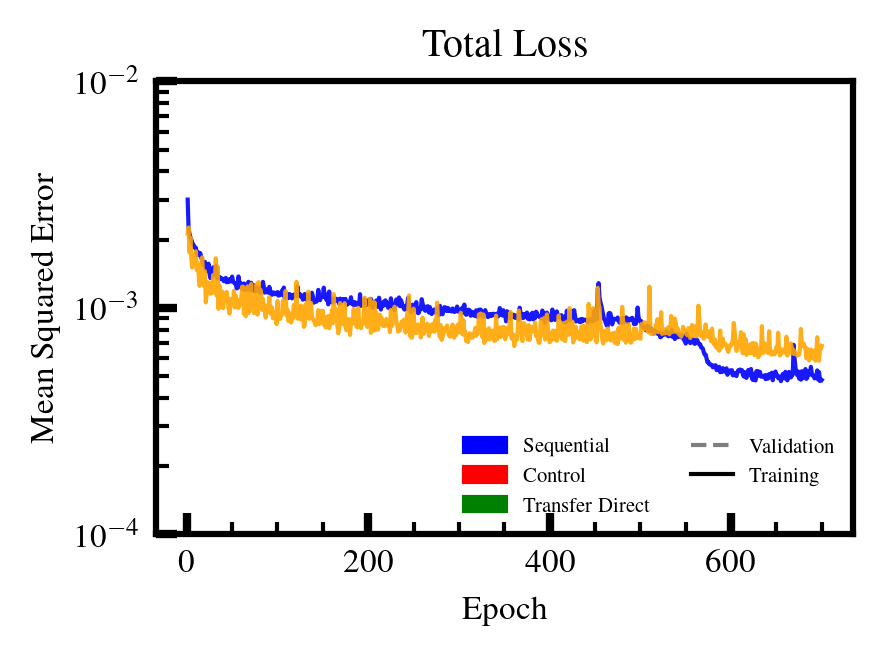

In [194]:
fig = plt.figure(figsize=(3,2), dpi=300)
ax = fig.add_subplot(111)

total_loss_direct_transfer = transfer_direct_full_history_df["trace_loss"].values#+ transfer_direct_full_history_df["phase_loss"].values + transfer_direct_full_history_df["amp_loss"].values
total_loss_control = control_full_history_df["trace_loss"].values #+ control_full_history_df["phase_loss"].values + control_full_history_df["amp_loss"].values
total_loss_sequntial = sequential_full_history_df["trace_loss"].values# + sequential_full_history_df["phase_loss"].values 

total_val_loss_direct_transfer = transfer_direct_full_history_df["trace_val_loss"].values# + transfer_direct_full_history_df["phase_val_loss"].values + transfer_direct_full_history_df["amp_val_loss"].values
total_val_loss_control = control_full_history_df["trace_val_loss"].values# + control_full_history_df["phase_val_loss"].values + control_full_history_df["amp_val_loss"].values
total_val_loss_sequntial = sequential_full_history_df["trace_val_loss"].values# + sequential_full_history_df["phase_val_loss"].values 

# ax.plot(transfer_direct_full_history_df["epoch"], total_loss_direct_transfer, label="Transfer Direct Loss", color="green",alpha=0.8)
# ax.plot(transfer_direct_full_history_df["epoch"], total_val_loss_direct_transfer, label="Transfer Direct Validation Loss", color="green", linestyle="--", alpha=0.5)
# ax.plot(control_full_history_df["epoch"], total_loss_control, label="Control Loss", color="red",alpha=0.8)
# ax.plot(control_full_history_df["epoch"], total_val_loss_control, label="Control Validation Loss", color="red", linestyle="--", alpha=0.5)
ax.plot(sequential_full_history_df["epoch"], total_loss_sequntial, label="Sequential Loss", color="blue",alpha=0.9)
# ax.plot(sequential_full_history_df["epoch"], total_val_loss_sequntial, label="Sequential Validation Loss", color="blue", linestyle="--", alpha=0.5)
ax.plot(transfer_history_trace_full_df["epoch"], transfer_history_trace_full_df["trace_val_loss"], label="Transfer Validation Loss", color="orange", linestyle="-", alpha=0.9)
# ax.plot(transfer_history_trace_full_df["epoch"], transfer_history_trace_full_df["trace_loss"], label="Transfer Loss", color="orange", linestyle="--", alpha=0.5)
ax.set_yscale("log")
ax.set_ylim(0.0001, 0.01)
ax.set_xlabel("Epoch")
ax.set_title("Total Loss")
ax.set_ylabel("Mean Squared Error")
ax.legend(loc="lower right", frameon=False,
        handles=[mpatches.Patch(color="blue") , mpatches.Patch(color="red"), mpatches.Patch(color="green"), ax.plot([],[], color="black", linestyle="--",alpha=0.5)[0], ax.plot([],[], color="black", linestyle="-")[0]],
        labels=["Sequential", "Control", "Transfer Direct", "Validation", "Training"],
        ncol=2, fontsize=5)
plt.show()
